# Import packages
> Uncomment the cell bellow to install Latex packages 

In [20]:
# !sudo apt-get install texlive-latex-recommended texlive-latex-extra texlive-fonts-recommended dvipng cm-super

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True
# plt.rcParams["text.latex.preamble"].join([
#         r"\usepackage[T1]{fontenc}",
#         r"\setmainfont{xcolor}",
# ])
import numpy as np
import os
from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

# Loading all the results from the results folder (takes time)

In [2]:
results_dir = "./results"
experiments = {}
os.listdir(results_dir)
for d in os.listdir(results_dir):
    if os.path.isdir(os.path.join(results_dir, d)) and not d.startswith("."):
        s_labeled_dir = os.path.join(results_dir, d)
        s_labeled = d.split("-")[1]
        experiments[s_labeled] = {}
        for a in os.listdir(s_labeled_dir):
            alpha_dir = os.path.join(s_labeled_dir, a)
            alpha = a.split("-")[1]
            experiments[s_labeled][alpha] = {}
            for c in os.listdir(alpha_dir):
                c_dir = os.path.join(alpha_dir, c)
                config = c
                experiments[s_labeled][alpha][config] = {}
                for f in os.listdir(c_dir):
                    if f.endswith(".csv"):
                        experiments[s_labeled][alpha][config][f] = pd.read_csv(os.path.join(c_dir, f), delim_whitespace=True)
                        experiments[s_labeled][alpha][config][f]["Risk"] = experiments[s_labeled][alpha][config][f]["Risk"].astype(float)
                        experiments[s_labeled][alpha][config][f]["Bound"] = experiments[s_labeled][alpha][config][f]["Bound"].astype(float)
                        # experiments[f]["Posterior_Qv"] = experiments[f]["Posterior_Qv"].apply(lambda x: )

IndexError: list index out of range

To transform the string lists in the csv file to float lists

In [2]:
def to_float(x):
    if isinstance(x, str):
        x = x.replace("[", "").replace("]", "").replace("'", "").replace("'", "").replace("\n", "").split(",")
        return np.array(x, dtype=float).astype(float)
    return x

Apply to_float

In [3]:
for s_labeled, s_exp  in experiments.items():
    for alpha, a_exp in s_exp.items():
        for config, c_exp in a_exp.items():
            for f, exp in c_exp.items():
                exp["Posterior_Qv"] = exp["Posterior_Qv"].apply(to_float)
                exp["Posterior_rho"] = exp["Posterior_rho"].apply(to_float)

NameError: name 'experiments' is not defined

In [4]:
RUNS = range(10)
BOUNDS = ['Uniform', 'PBkl', 'PBkl_inv', 'TND_DIS', 'TND_DIS_inv', 'TND', 'TND_inv', 'DIS', 'DIS_inv', 'Cbound', 'C_TND']
MC_BOUNDS = ['TND', 'TND_inv', 'C_TND'] # Muticlass classification specific bounds

# Bounds mapping
Bounds_map = {'Uniform': rf'\boldmath{{$\mathcal{{U}}nf$}}',
              'PBkl': rf'\boldmath{{$\mathcal{{R}}(\mathcal{{Q}},\rho)$}}',
              'PBkl_inv': rf'\boldmath{{$\mathcal{{K}}(\mathcal{{Q}},\rho)$}}',
              'TND_DIS': rf'\boldmath{{$\mathcal{{E}}(\mathcal{{Q}},\rho)$}}',
              'TND_DIS_inv': rf'\boldmath{{$\mathcal{{K}}^{{u}}(\mathcal{{Q}},\rho)$}}',
              'TND': rf'\boldmath{{$\mathcal{{E}}_{{\textnormal{{II}}}}(\mathcal{{Q}},\rho)$}}',
              'TND_inv': rf'\boldmath{{$\mathcal{{K}}_{{\textnormal{{II}}}}(\mathcal{{Q}},\rho)$}}',
              'DIS': rf'\boldmath{{$\mathcal{{R}}_{{\textnormal{{II}}}}(\mathcal{{Q}},\rho)$}}',
              'DIS_inv': rf'\boldmath{{$\mathcal{{K}}^{{u}}_{{\textnormal{{II}}}}(\mathcal{{Q}},\rho)$}}',
              'Cbound': rf'\boldmath{{$\mathcal{{C}}_{{S}}^{{S}}(\mathcal{{Q}})$}}',
              'C_TND': rf'\boldmath{{$\mathcal{{C}}_{{S}}^{{T}}(\rho)$}}'}

# Multiview bounds mapping
Mv_bounds_map = {'Uniform': rf'\boldmath{{$\mathcal{{U}}nf$}}',
              'PBkl': rf'\boldmath{{$\mathcal{{R}}(\mathcal{{Q}}_v,\rho)$}}',
              'PBkl_inv': rf'\boldmath{{$\mathcal{{K}}(\mathcal{{Q}}_v,\rho)$}}',
              'TND_DIS': rf'\boldmath{{$\mathcal{{E}}(\mathcal{{Q}}_v,\rho)$}}',
              'TND_DIS_inv': rf'\boldmath{{$\mathcal{{K}}^{{u}}(\mathcal{{Q}}_v,\rho)$}}',
              'TND': rf'\boldmath{{$\mathcal{{E}}_{{\textnormal{{II}}}}(\mathcal{{Q}}_v,\rho)$}}',
              'TND_inv': rf'\boldmath{{$\mathcal{{K}}_{{\textnormal{{II}}}}(\mathcal{{Q}}_v,\rho)$}}',
              'DIS': rf'\boldmath{{$\mathcal{{R}}_{{\textnormal{{II}}}}(\mathcal{{Q}}_v,\rho)$}}',
              'DIS_inv': rf'\boldmath{{$\mathcal{{K}}^{{u}}_{{\textnormal{{II}}}}(\mathcal{{Q}}_v,\rho)$}}',
              'Cbound': rf'\boldmath{{$\mathcal{{C}}_{{S}}^{{S}}(\mathcal{{Q}}_v)$}}',
              'C_TND': rf'\boldmath{{$\mathcal{{C}}_{{S}}^{{T}}(\rho)$}}'}

# Bounds mapping with equation references
Bounds_map_ref = {'Uniform': '$\\mathcal{U}nf$\\ref{Hennequin_Bound_Macallester}',
              'PBkl': '$\\mathcal{R}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-kl-FO}',
              'PBkl_inv': '$\\mathcal{K}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-kl-inv-FO}',
              'TND_DIS': '$\\mathcal{E}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-joint-dis-mv-FO}',
              'TND_DIS_inv': '$\\mathcal{K}^{u}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-joint-dis-inv-mv-FO}',
              'TND': '$\\mathcal{E}_{\\text{II}}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-joint-mv-SO}',
              'TND_inv': '$\\mathcal{K}_{\\textnormal{II}}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-joint-inv-mv-SO}',
              'DIS': '$\\mathcal{R}_{\\textnormal{II}}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-dis-mv-SO}',
              'DIS_inv': '$\\mathcal{K}^{u}_{\\textnormal{II}}(\\mathcal{Q}_v,\\rho)$\\ref{Eq-Pac-bayes-dis-inv-mv-SO}',
              'Cbound': '$\\mathcal{C}_{S}^{S}(\\mathcal{Q}_v)$\\ref{Eq-Pac-bayes-mv-C-Bound}',
              'C_TND': '$\\mathcal{C}_{S}^{T}(\\rho)$\\ref{Eq-Pac-bayes-mv-C-tandem-Bound}'}

In [5]:
# Optimized distributions mapping (for distributions plot)
dist_map = {'Uniform': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{U}}nf}}(h)$}}',
              'PBkl': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{R}}}}^*(h)$}}',
              'PBkl_inv': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{K}}}}^*(h)$}}',
              'TND_DIS': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{E}}}}^*(h)$}}',
              'TND_DIS_inv': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{K}}^{{u}}}}^*(h)$}}',
              'TND': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{E}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'TND_inv': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{K}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'DIS': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{R}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'DIS_inv': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{K}}^{{u}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'Cbound': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{C}}_{{S}}^{{S}}}}^*(h)$}}',
              'C_TND': rf'\boldmath{{$\mathcal{{Q}}_{{\mathcal{{C}}_{{S}}^{{T}}}}^*(h)$}}'}

# Optimized hyper-posterior distributions mapping (for distributions plot)
Mv_dist_map = {'Uniform': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{U}}nf}}(h)$}}',
              'PBkl': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{R}}}}^*(h)$}}',
              'PBkl_inv': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{K}}}}^*(h)$}}',
              'TND_DIS': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{E}}}}^*(h)$}}',
              'TND_DIS_inv': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{K}}^{{u}}}}^*(h)$}}',
              'TND': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{E}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'TND_inv': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{K}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'DIS': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{R}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'DIS_inv': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{K}}^{{u}}_{{\textnormal{{II}}}}}}^*(h)$}}',
              'Cbound': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{C}}_{{S}}^{{S}}}}^*(h)$}}',
              'C_TND': rf'\boldmath{{$\mathcal{{\rho}}_{{\mathcal{{C}}_{{S}}^{{T}}}}^*(h)$}}'}

In [6]:
def plot_results_grid(exps, m, file_name, runs=len(RUNS), bounds=BOUNDS):

    sns.set_style(style="ticks")
    bounds_palette = sns.color_palette("viridis", n_colors=len(bounds)+1)
    risk_palette = sns.color_palette("flare", n_colors=len(bounds)+1)
    risk_palette.reverse()

    num_views = len(exps['View'].unique())
    num_views = len(exps['View'].unique())
    num_cols = num_views // 2 + num_views % 2  # Calculate number of columns for subplots

    fig, ax = plt.subplots(2, num_cols, figsize=(num_cols * 3, 2 * 4), sharey=True)

    if num_views == 1:
        ax = [ax]  # Ensure ax is always iterable

    for i, view in enumerate(exps['View'].unique()):
        view_data = exps[exps['View'] == view]
        row = i // num_cols
        col = i % num_cols

        # Plot Bound
        sns.barplot(x='Bound_name', y='Bound', data=view_data, ax=ax[row, col], hue='Bound_name', hatch='.', palette=bounds_palette)
        sns.barplot(x='Bound_name', y='Risk', data=view_data, ax=ax[row, col], hue='Bound_name', hatch='\\', palette=risk_palette)

        # ax[row, col].set_title(f'{view}')
        ax[row, col].set_xlabel(r"\bf{Methods}", color="C0", fontsize=8)
        ax[row, col].set_ylabel(r"\bf{Means}", color="C0", fontsize=8)
        plt.setp(ax[row, col].xaxis.get_majorticklabels(), rotation=70, fontsize=12)

         # Highlight spines
        if "Multiview" in view:
          for spine in ax[row, col].spines.values():
              spine.set_linewidth(2)
              spine.set_color('C1')

        title_text = f'{view}'
        title_x = 0.5
        title_y = 0.6
        ax[row, col].annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
                               ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"

    for i in range(num_views, 2 * num_cols):
        ax[num_views // num_cols, i % num_cols].axis('off')

    fig.tight_layout()
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()

In [7]:
# Same but plots only the concatenated view and multi-view results
def plot_mc_results_grid(exps, m, file_name, runs=len(RUNS), bounds=BOUNDS):

    sns.set_style(style="ticks")
    bounds_palette = sns.color_palette("viridis", n_colors=len(bounds)+1)
    risk_palette = sns.color_palette("flare", n_colors=len(bounds)+1)
    risk_palette.reverse()

    num_views = len(exps['View'].unique())
    num_views = len(exps['View'].unique())
    num_cols = num_views // 2 + num_views % 2  # Calculate number of columns for subplots

    fig, ax = plt.subplots(1, 2, figsize=(4 * 2, 4), sharey=True)

    if num_views == 1:
        ax = [ax]  # Ensure ax is always iterable

    for i, view in enumerate(exps['View'].unique()):
        view_data = exps[exps['View'] == view]
        row = i // num_cols
        col = i % num_cols

        # Plot Bound
        sns.barplot(x='Bound_name', y='Bound', data=view_data, ax=ax[row], hue='Bound_name', hatch='.', palette=bounds_palette)
        sns.barplot(x='Bound_name', y='Risk', data=view_data, ax=ax[row], hue='Bound_name', hatch='\\', palette=risk_palette)

        ax[row].set_title(f'{view}')
        ax[row].set_xlabel(r"\bf{Methods}", color="C0", fontsize=8)
        ax[row].set_ylabel(r"\bf{Means}", color="C0", fontsize=8)
        plt.setp(ax[row].xaxis.get_majorticklabels(), rotation=70)

         # Highlight spines
        if "Multiview" in view:
          for spine in ax[row].spines.values():
              spine.set_linewidth(2)  # Set spine width
              spine.set_color('C1')  # Set spine color

        # title_text = f'{view}'
        # title_x = 0.5
        # title_y = 0.6
        # ax[row].annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
        #                        ha='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"

    for i in range(num_views, 2 * num_cols):
        ax[num_views // num_cols].axis('off')

    fig.tight_layout()
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()

# Bar plots
> chose the needed setting: e.g.,
```py
s_labeled = "50"
alpha = "2"
config = "strong_learner"
```
> and file name
```
file_name = "Fashion-MNIST-MV-sample1_mult_10runs.csv"
```

In [13]:
s_labeled = "20"
alpha = "0.5"
config = "weak_learner"
file_name = "Multiple-Features_alpha-all_4vs9_10runs.csv"
#df = experiments[s_labeled][alpha][config][file_name]
path = "results/s_labeled-20/alpha-0.5/weak_learner/Multiple-Features_alpha-all_4vs9_10runs.csv"
df = pd.read_csv(path, delimiter=" ")
df["Risk"] = df["Risk"].astype(float).apply(lambda x: x if x < 1 else 1)
df["Bound"] = df["Bound"].astype(float).apply(lambda x: x if x < 1 else 1)
# df.head()

In [14]:
# Because this throows error when executing multiple times for one result DataFrame 
try:
    # df.loc[df['View'] == "Multiview", "Bound_name"] = df.loc[df['View'] == "Multiview", "Bound_name"].apply(lambda x: Mv_bounds_map[x])
    # df.loc[df['View'] != "Multiview", "Bound_name"] = df.loc[df['View'] != "Multiview", "Bound_name"].apply(lambda x: Bounds_map[x])
    # # df["Bound_name"] = df["Bound_name"].apply(lambda x: Bounds_map[x])
    # df["View"] = df["View"].apply(lambda x: r"\bf{"+x+r"}")
    pass
except:
    pass

In [15]:
# contruct the file name for saving
save_file_name = "_".join([s_labeled, alpha.replace(".", ","), config.replace("_", "-"), file_name.split(".")[0]]) + ".pdf"
save_file_name

'20_0,5_weak-learner_Multiple-Features_alpha-all_4vs9_10runs.pdf'

Chose if you want to plot all the results or only the concatenated view and multi-view results

In [25]:
df[df["Bound_name"] == "PBkl"].head(20)

,Run,Bound_name,View,Risk,Gibbs_Risk,Bound,Join_Error,Disagreement,KL_QP,KL_RhoPi,n_labeled,n_all,Posterior_Qv,Posterior_rho
8,1,PBkl,View1,0.258,0.327,0.739,0.172,0.309,1.893,NaN,2362.0,2362.0,"['0.000519628', '0.003241284', '0.068583399', ...",NaN
9,1,PBkl,View2,0.171,0.162,0.393,0.100,0.123,1.801,NaN,2362.0,2362.0,"['0.000433452', '0.029304031', '0.013334774', ...",NaN
10,1,PBkl,View3,0.150,0.251,0.577,0.100,0.302,0.611,NaN,2362.0,2362.0,"['0.001552646', '0.001537040', '0.011971337', ...",NaN
11,1,PBkl,View4,0.101,0.197,0.462,0.072,0.250,0.188,NaN,2362.0,2362.0,"['0.015493137', '0.004567494', '0.004585026', ...",NaN
12,1,PBkl,View5,0.123,0.183,0.432,0.078,0.212,0.186,NaN,2362.0,2362.0,"['0.004687161', '0.001870398', '0.013845617', ...",NaN
13,1,PBkl,View6,0.427,0.428,0.942,0.355,0.146,1.207,NaN,2362.0,2362.0,"['0.000578240', '0.000511983', '0.001391012', ...",NaN
14,1,PBkl,Concatenated,0.082,0.167,0.398,0.057,0.220,0.349,NaN,2362.0,2362.0,"['0.017943203', '0.002838911', '0.002908591', ...",NaN
15,1,PBkl,Multiview,0.067,0.235,0.541,0.078,0.338,-0.053,-0.032,2362.0,2362.0,"[['0.005279460', '0.016748738', '0.017486768',...","['0.066494241', '0.233689576', '0.161552235', ..."
96,2,PBkl,View1,0.256,0.330,0.743,0.158,0.346,1.094,NaN,2362.0,2362.0,"['0.001511044', '0.021042367', '0.001406835', ...",NaN
97,2,PBkl,View2,0.154,0.214,0.497,0.088,0.251,0.281,NaN,2362.0,2362.0,"['0.015136332', '0.020694181', '0.005085041', ...",NaN


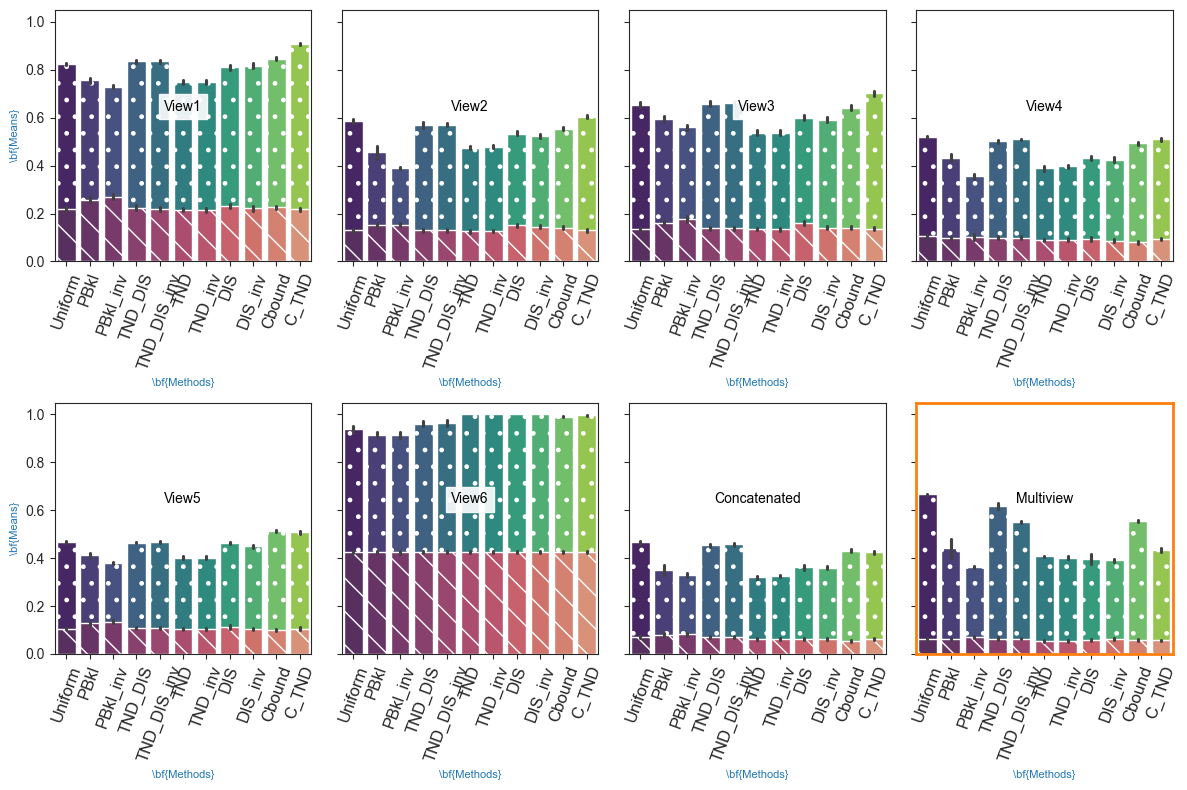

In [16]:
# plot_mc_results_grid(df.loc[df['View'].isin([r"\bf{Multiview}", r"\bf{Concatenated}"])], 590, save_file_name)
plot_results_grid(df, 590, save_file_name)

In [9]:
# execute this command to convert .pdf result file into .png
# !pdftoppm -png -r 300 "Multiple-Features_4vs9_20runs.pdf" "Multiple-Features_4vs9_20runs.png"

/bin/bash: line 1: pdftoppm: command not found


# Generate Latex table

Execute and copy the cell output

In [135]:
# Similarly, chose a setting and a file name
file_name = "Multiple-Features_alpha-all_4vs9_10runs.csv"
df = experiments["20"]["0.5"]["weak_learner"][file_name]
dataset_name =  file_name[:4] + "."
dataset_name += " " + file_name.split(".")[0].split("_")[1]

epsilon = 1e-5

# Group by "Bound_name" and "View" and calculate mean
grouped_df = df.groupby(["Bound_name", "View"]).mean()

# Get unique bound names
unique_bound_names = grouped_df.index.get_level_values("Bound_name").unique()
views = grouped_df.index.get_level_values("View").unique()
views_names = list(views)
for i, view in enumerate(views_names):
    if view == "Concatenated":
        views_names[i] = "Con."
    elif view == "Multiview":
        views_names[i] = "MV"
        

# Calculate total means for each bound name and column
total_means = grouped_df.groupby(level=1).mean()
overall_total_mean = total_means

# Find the minimum Bound and Risk values
min_total_bound = total_means['Bound'].min()
min_total_risk = total_means['Risk'].min()

grouped_views_first_df = df.groupby(["View", "Bound_name"]).mean()
total_alg_means = grouped_views_first_df[["Risk", "Gibbs_Risk", "Bound"]].groupby(level=1).mean()
min_total_bound_v = total_alg_means['Bound'].min()
min_total_risk_v = total_alg_means['Risk'].min()

# Initialize LaTeX table string
latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Caption here}\n\\begin{tabular}{|l|p{0,7cm}||p{0,7cm}||" + "|".join(["p{0,7cm}"] * (len(views) -2)) + "||p{0,7cm}|}\n\\hline\n \\hline\n"
latex_table += "\\multirow{2}{*}{} & \\multicolumn{" + str(len(views)) + "}{c|}{\\textbf{" + dataset_name + "}} & \\textbf{{Mean}} \\\\ \n"
latex_table += "& " + " & ".join([f"\\multicolumn{{1}}{{c}}{{\\textbf{{{view}}}}}" for view in views_names]) + " & \\\\ \n"
latex_table += "\\hline\n \\hline\n"

# Function to add rows for each bound name
def add_bound_rows(bound_name):
    rows = []
    for col in ["Bound", "Gibbs_Risk", "Risk"]:
        if col == "Risk":
            col_name = "$\\mathcal{B}$"
        elif col == "Gibbs_Risk":
            col_name = "$G$"
        else:
            col_name = "Bnd"
        row = f"{col_name} "
        total_mean = 0
        for view in views:
            mean_values = grouped_df.loc[(bound_name, view)]
            value = mean_values[col]
            total_mean += value
            formatted_value = "{:.3f}".format(value).lstrip('0') if value < 1 else "1.0"
            row += f"& {formatted_value} "
        total_mean /= len(views)
        total_mean_formatted = "{:.3f}".format(total_mean).lstrip('0') if total_mean < 1 else "1.0"
        
        # Apply bold or underline formatting based on minimum values
        # print(total_mean_view[col], min_total_bound, min_total_risk)
        if np.abs(total_mean - min_total_bound_v) <= epsilon:
            total_mean_formatted = f"\\textbf{{{total_mean_formatted}}}"
        if np.abs(total_mean - min_total_risk_v) <= epsilon:
            total_mean_formatted = f"\\underline{{{total_mean_formatted}}}"
            
        row += f"& {total_mean_formatted} "
        if col == "Risk":
            row += "\\\\ \\cline{1-" + str(len(views) + 2) + "}\n"
        else:
            row += "\\\\ \n"
        rows.append(row)
    return rows

# Iterate over unique bound names
for i, bound_name in enumerate(BOUNDS):
    # latex_table += f"\multicolumn{{1}}{{|c|}}{{\\boldmath{{{Bounds_map[bound_name]}}}}} \\\\ \\cline{{2-{str(len(views) + 2)}}}\n"
    latex_table += f"\multicolumn{{1}}{{|c|}}{{\\boldmath{{{Bounds_map_ref[bound_name]}}}}} \\\\ \n"
    dataset_name = ""  # Reset dataset name to only show for the first bound name row
    latex_table += ''.join(add_bound_rows(bound_name))

# Calculate total means for the entire table
total_means = grouped_df.groupby(level=1).mean()
latex_table += f"\\textbf{{Mean}} \\\\ \\cline{{1-{str(len(views) + 1)}}}\n"
for col in ["Bound", "Gibbs_Risk", "Risk"]:
    if col == "Risk":
        col_name = "$\\mathcal{B}$"
    elif col == "Gibbs_Risk":
        col_name = "$G$"
    else:
        col_name = "Bnd"
    row = f"{col_name} "
    
    for view in views:
        total_mean_view = total_means.loc[view]
        formatted_total_mean = "{:.3f}".format(total_mean_view[col]).lstrip('0') if total_mean_view[col] < 1 else "1.0"
        # Apply bold or underline formatting based on minimum values
        # print(total_mean_view[col], min_total_bound, min_total_risk)
        if np.abs(total_mean_view[col] - min_total_bound) <= epsilon:
            formatted_total_mean = f"\\textbf{{{formatted_total_mean}}}"
        if np.abs(total_mean_view[col] - min_total_risk) <= epsilon:
            formatted_total_mean = f"\\underline{{{formatted_total_mean}}}"
        row += f"& {formatted_total_mean} "
    if col == "Risk":
        row += "\\\\ \\cline{1-" + str(len(views) + 1) + "}\n"
    else:
        row += "\\\\ \n"
    latex_table += row
# total_mean_all = total_means.mean()
# formatted_total_mean_all = "{:.3f}".format(total_mean_all).lstrip('0') if total_mean_all != 1 else "1.0"
# latex_table += f"& {formatted_total_mean_all} \\\\ \n"

# End the LaTeX table
latex_table += "\\end{tabular}\n\\label{tab:my_label}\n\\end{table}"
print(latex_table)

\begin{table}[htbp]
\centering
\caption{Caption here}
\begin{tabular}{|l|p{0,7cm}||p{0,7cm}||p{0,7cm}|p{0,7cm}|p{0,7cm}|p{0,7cm}|p{0,7cm}|p{0,7cm}||p{0,7cm}|}
\hline
 \hline
\multirow{2}{*}{} & \multicolumn{8}{c|}{\textbf{Mult. alpha-all}} & \textbf{{Mean}} \\ 
& \multicolumn{1}{c}{\textbf{Con.}} & \multicolumn{1}{c}{\textbf{MV}} & \multicolumn{1}{c}{\textbf{View1}} & \multicolumn{1}{c}{\textbf{View2}} & \multicolumn{1}{c}{\textbf{View3}} & \multicolumn{1}{c}{\textbf{View4}} & \multicolumn{1}{c}{\textbf{View5}} & \multicolumn{1}{c}{\textbf{View6}} & \\ 
\hline
 \hline
\multicolumn{1}{|c|}{\boldmath{$\mathcal{U}nf$\ref{Hennequin_Bound_Macallester}}} \\ 
Bnd & .466 & .667 & .825 & .585 & .655 & .520 & .466 & .941 & .641 \\ 
$G$ & .200 & .296 & .373 & .257 & .290 & .225 & .200 & .431 & .284 \\ 
$\mathcal{B}$ & .071 & .062 & .220 & .130 & .136 & .105 & .106 & .426 & .157 \\ \cline{1-10}
\multicolumn{1}{|c|}{\boldmath{$\mathcal{R}(\mathcal{Q}_v,\rho)$\ref{Eq-Pac-bayes-kl-FO}}} \\ 
Bnd & .35

# Distributions plotting

This section accepts only the results taken from the the file `empirical-evaluation-dist.ipynb`

In [280]:
results_dir = "~/Multi-View-Majority-Vote-Learning-Algorithms-Direct-Minimization-of-PAC-Bayesian-Bounds/results/"
path = results_dir + "Multiple-Features_4vs9_10runs_20labeled_0.5alpha_weak_learner_results.csv"
df_normal = pd.read_csv(path, sep=";")
path = results_dir + "Multiple-Features_poisoned_4vs9_10runs_20labeled_0.5alpha_weak_learner_MVresults.csv"
df_poisoned = pd.read_csv(path, sep=";")

In [283]:
df_normal.columns

Index(['Run', 'Bound_name', 'Risk', 'Bound', 'Gibbs_Risks_estimators',
       'Gibbs_Risks_views', 'Join_Error', 'Disagreement', 'KL_QP', 'KL_RhoPi',
       'n_labeled', 'n_all', 'Posterior_Qv', 'Posterior_rho'],
      dtype='object')

In [281]:
# columns we're interested in
list_cols = ['Gibbs_Risks_estimators', 'Posterior_rho', 'Posterior_Qv', 'Gibbs_Risks_views']
for col in list_cols:
    df_normal[col] = df_normal[col].apply(literal_eval)
    df_poisoned[col] = df_poisoned[col].apply(literal_eval)
    # df[col] = df[col].apply(lambda x: np.array(x))

This cell groupes the DataFrames by `Bound_name` columns and aggregates the lists using mean item by item

In [284]:
# Define custom aggregation functions
def mean_of_lists(series):
    # Transpose list of lists to calculate the mean of each element across all lists
    transposed = np.array(series.tolist()).T
    return [np.mean(sublist) for sublist in transposed]

def mean_of_nested_lists(series):
    num_sublists = len(series.iloc[0])
    sublist_length = len(series.iloc[0][0])
    
    # Initialize an array to store sums and counts
    sums = np.zeros((num_sublists, sublist_length))
    counts = np.zeros((num_sublists, sublist_length))
    
    # Sum up the values and count the occurrences
    for sublist in series:
        for i, inner_list in enumerate(sublist):
            sums[i] += inner_list
            counts[i] += 1
    
    # Calculate the mean
    means = sums / counts
    return means.tolist()

# Group by the 'group' column and apply aggregation
numeric_cols = df_normal.select_dtypes(include=np.number).columns
agg_dict = {'Gibbs_Risks_views': mean_of_lists, 
            'Posterior_rho': mean_of_lists,
            'Posterior_Qv': mean_of_nested_lists,
            'Gibbs_Risks_estimators': mean_of_nested_lists}
agg_dict.update({col: 'mean' for col in numeric_cols if col not in agg_dict})
grouped_normal = df_normal.groupby('Bound_name').agg(agg_dict)
grouped_poisoned = df_poisoned.groupby('Bound_name').agg(agg_dict)

In [285]:
def create_hist_data(grouped_df, col):
    data = {}
    for i in range(len(grouped_df.loc["PBkl_inv", col])):
        view = f"View {i+1}"
        bounds = grouped_df["Bound"].sort_values()[:2].index
        data[view] = [grouped_df.loc[bound, col][i] for bound in grouped_df["Bound"].sort_values()[:2].index]
    return data, list(bounds)


#### Plotting only the multiview distributions of the best two performing bounds before and after poisoning and the gibbs risk after poisoning

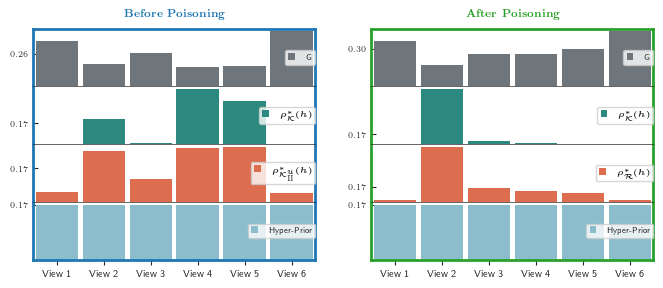

In [297]:
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.linewidth'] = 0.5

fig = plt.figure(figsize=(8, 3))  # Adjust the figure size as needed

# Create the grid layout
grid = plt.GridSpec(4, 2, hspace=0, wspace=0.2)  # Increased vertical space between blocks to 0.5

for pos, agg_df in enumerate([grouped_normal, grouped_poisoned]):
    # Create data for prior distribution and posterior_rho
    views_prob, labels_prob = create_hist_data(agg_df, col="Posterior_rho")
    views_risk, _ = create_hist_data(agg_df, col="Gibbs_Risks_views")
    arr_prob = [views_prob[view][0] for view in views_prob.keys()]
    arr_prob2 = [views_prob[view][1] for view in views_prob.keys()]
    arr_risk = [views_risk[view][0] for view in views_risk.keys()]
    data = [np.array(arr_risk), np.array(arr_prob), np.array(arr_prob2), np.full((6,), 1 / 6)]
    labels = [r"G"] + [Mv_dist_map[l] for l in labels_prob] + [r"Hyper-Prior"]
    
    # Multiview plots (grisk, best posterior, second best posterior, prior)
    color = "C0" if pos==0 else "C2"
    palette = ["#6c757d", "#1b998b", "#f46036", "#81c3d7"]
    for i, d in enumerate(data):
        ax = fig.add_subplot(grid[i, pos])
        sns.barplot(x=list(views_prob.keys()), y=d, width=0.9, color=palette[i], ax=ax, alpha=1, linewidth=0, label=labels[i])
        ax.set_title('')
        ax.set_ylabel('')
    
        mean_value = np.mean(data[i])
        ax.set_yticks([mean_value])
        ax.set_yticklabels([rf'${mean_value:.2f}$'], fontsize=6)
        ax.tick_params(axis='y', direction='in', labelsize=6)
        
        if i == 0:
            title_x = 0.5
            title_y = 1.2
            if pos == 0:
                title_text = r'\bf{Before Poisoning}'
                ax.annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
                               ha='center', fontsize=8, color=color, bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"
            else:    
                title_text = r'\bf{After Poisoning}'
                ax.annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
                               ha='center', fontsize=8, color=color, bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"
    
        legend = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), fontsize=6, handletextpad=0.1, borderaxespad=0)
        for handle in legend.legendHandles:
            handle.set_width(5)
            handle.set_height(5)
    
        if i == 0:
            for s, spine in enumerate(ax.spines.values()):
                if s != 2:
                    spine.set_linewidth(2)  # Set spine width
                    spine.set_color(color)  # Set spine color
        if i==1 or i==2:
            for s, spine in enumerate(ax.spines.values()):
                if s != 2 and s != 3:
                    spine.set_linewidth(2)  # Set spine width
                    spine.set_color(color)  # Set spine color
        if i==3:
            for s, spine in enumerate(ax.spines.values()):
                if s != 3:
                    spine.set_linewidth(2)  # Set spine width
                    spine.set_color(color)  # Set spine color


plt.tight_layout(pad=0.4)
plt.subplots_adjust(hspace=1.5)  # Increased vertical space between every set of four rows to 1.5
plt.savefig("Multiple-Features_poisoning_4vs9_10runs_20labeled_0.5alpha_weak_learner_MVresults.pdf", bbox_inches='tight')
plt.show()

#### Plotting all the distributions of the best two performing bounds before and after poisoning and the gibbs risk after poisoning

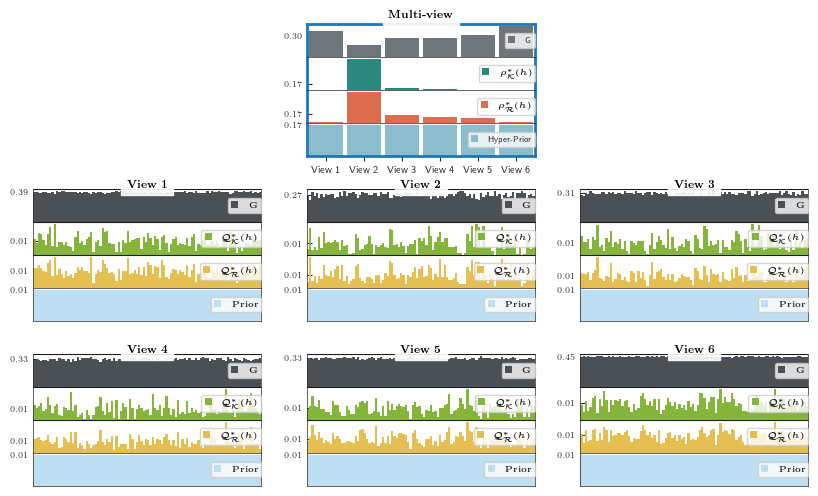

In [309]:
plt.rcParams.update({'font.size': 7})
plt.rcParams['axes.linewidth'] = 0.5

fig = plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Create the grid layout
grid = plt.GridSpec(14, 3, hspace=0, wspace=0.2)  # Increased vertical space between blocks to 0.5

# Create data for prior distribution and posterior_rho
views_prob, labels_prob = create_hist_data(grouped_normal, col="Posterior_rho")
views_risk, _ = create_hist_data(grouped_normal, col="Gibbs_Risks_views")
arr_prob = [views_prob[view][0] for view in views_prob.keys()]
arr_prob2 = [views_prob[view][1] for view in views_prob.keys()]
arr_risk = [views_risk[view][0] for view in views_risk.keys()]
data = [np.array(arr_risk), np.array(arr_prob), np.array(arr_prob2), np.full((6,), 1 / 6)]
labels = [r"G"] + [Mv_dist_map[l] for l in labels_prob] + [r"Hyper-Prior"]

# Multiview plots (grisk, best posterior, second best posterior, prior)
palette = ["#6c757d", "#1b998b", "#f46036", "#81c3d7"]
for i, d in enumerate(data):
    ax = fig.add_subplot(grid[i, 1])
    sns.barplot(x=list(views_prob.keys()), y=d, width=0.9, color=palette[i], ax=ax, alpha=1, linewidth=0, label=labels[i])
    ax.set_title('')
    ax.set_ylabel('')

    mean_value = np.mean(data[i])
    ax.set_yticks([mean_value])
    ax.set_yticklabels([rf'${mean_value:.2f}$'], fontsize=6)
    ax.tick_params(axis='y', direction='in', labelsize=6)
    
    if i == 0:
        title_text = r'\bf{Multi-view}'
        title_x = 0.5
        title_y = 1.2
        ax.annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
                           ha='center', fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"

    legend = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), fontsize=6, handletextpad=0.1, borderaxespad=0)
    for handle in legend.legendHandles:
        handle.set_width(5)
        handle.set_height(5)

    if i == 0:
        for s, spine in enumerate(ax.spines.values()):
            if s != 2:
                spine.set_linewidth(2)  # Set spine width
                spine.set_color('C0')  # Set spine color
    if i==1 or i==2:
        for s, spine in enumerate(ax.spines.values()):
            if s != 2 and s != 3:
                spine.set_linewidth(2)  # Set spine width
                spine.set_color('C0')  # Set spine color
    if i==3:
        for s, spine in enumerate(ax.spines.values()):
            if s != 3:
                spine.set_linewidth(2)  # Set spine width
                spine.set_color('C0')  # Set spine color

# Add subplots for each view's data starting from the second row
arr, labels = create_hist_data(grouped_normal, col="Posterior_Qv")
palette = ["#495057", "#8ac926", "#ffca3a", "#b5e2fa"]

sequence_map = {
    0: [5, 6, 7, 8],
    1: [10, 11, 12, 13]
}

# Function to get the row value based on i and idx
def get_row_value(i, idx):
    sequence_index = idx // 3
    return sequence_map[sequence_index][i]

for idx, view in enumerate(views_prob.keys()):
    data = [create_hist_data(grouped_normal, col="Gibbs_Risks_estimators")[0][view][0]] + arr[view] + [np.full((100,), 1 / 100)]
    labels_view = [r"\bf{G}"] + [dist_map[l] for l in labels] + [r"\bf{Prior}"]
    
    num_bounds = len(data)
    array_size = len(data[0])
    
    for i in range(num_bounds):
        row = get_row_value(i, idx)
        col = idx % 3
        ax = fig.add_subplot(grid[row, col])

        sns.barplot(x=np.arange(array_size), y=np.array(data[i]), ax=ax, width=1, color=palette[i % len(palette)], alpha=1, linewidth=0, label=labels_view[i])
        
        mean_value = np.mean(data[i])
        ax.set_yticks([mean_value])
        ax.set_yticklabels([rf'${mean_value:.2f}$'], fontsize=6)
        ax.tick_params(axis='y', direction='in', labelsize=6)
        
        if i < num_bounds - 1:
            ax.axhline(y=ax.get_ylim()[1], color='black')
            
        ax.set_xlabel('')
        ax.set_xticks([])

        legend = ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), fontsize=6, handletextpad=0.1, borderaxespad=0)
        for handle in legend.legendHandles:
            handle.set_width(5)
            handle.set_height(5)

        if i == 0:
            title_text = rf'\bf{{{view}}}'
            title_x = 0.5
            title_y = 1.05
            ax.annotate(title_text, xy=(title_x, title_y), xycoords='axes fraction',
                               ha='center', fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.9)) # boxstyle="round,pad=0.3"

plt.tight_layout(pad=0.4)
plt.subplots_adjust(hspace=1.5)  # Increased vertical space between every set of four rows to 1.5
plt.savefig("Multiple-Features_poisoning_4vs9_10runs_20labeled_0.5alpha_weak_learner_results.pdf", bbox_inches='tight')
plt.show()

# line plot of the bound value as a function of $s\_labeled\_size$

In [39]:
alpha = "0.5"
config = "stump"
file_name = "Mushrooms_evsp_10runs.csv"
mean_risks = {}
mean_bounds = {}
mean_risks_tnd = {}
mean_bounds = {}
s_labeled_sizes = ['5', '10', '20', '30', '40', '50']
chosen_bounds = BOUNDS # could be ["TND_inv", 'DIS_inv']
for bound in chosen_bounds:
    mean_bounds[bound] = {}
    for s in s_labeled_sizes:
        df = experiments[s][alpha][config][file_name]
        df["Risk"] = df["Risk"].astype(float).apply(lambda x: x if x < 1 else 1)
        df["Bound"] = df["Bound"].astype(float).apply(lambda x: x if x < 1 else 1)
        grouped_df = df.groupby(["Bound_name", "View"]).mean()
        # mean_risks[int(s)] = grouped_df.loc[bound, "Risk"]["Multiview"]
        mean_bounds[bound][int(s)] = grouped_df.loc[bound, "Bound"]["Multiview"]
        

In [40]:
# mean_risks = pd.Series(mean_risks).sort_index()
for k, bnd in mean_bounds.items():
    mean_bounds[k] = pd.Series(bnd).sort_index()


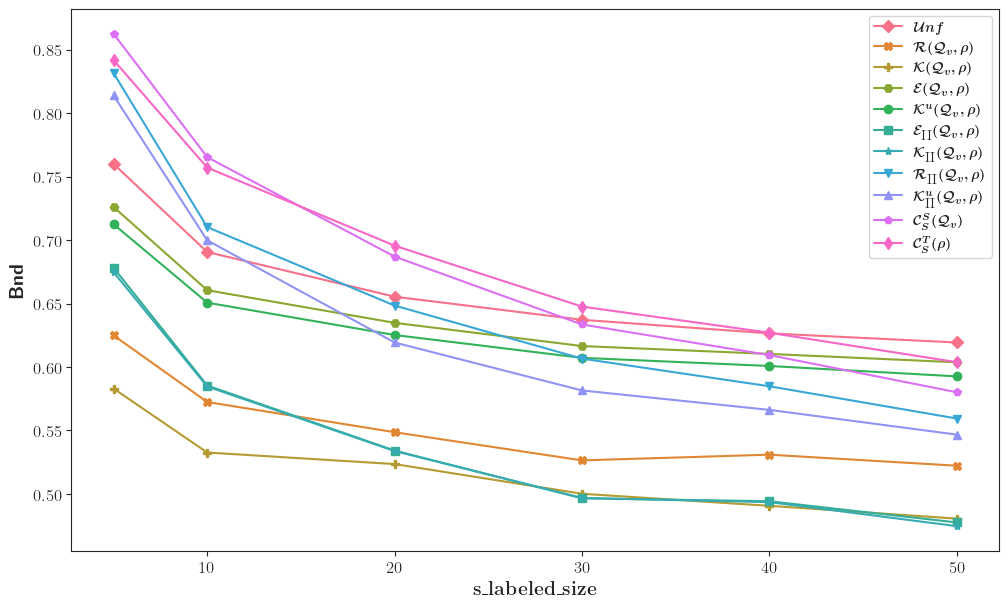

In [41]:
# Plot the data
plt.figure(figsize=(10, 6))
markers = ["D", "X", "P", "H", "o", "s", "*", "v", "^", "p", "d"]
for i, (k, bnd) in enumerate(mean_bounds.items()):
    plt.plot(bnd.index, bnd.values, marker=markers[i], color= sns.color_palette("husl", 11)[i], alpha=1, linestyle='-', label=Mv_bounds_map[k])


# Adding titles and labels
plt.title('')
plt.xlabel(r'$\bf{s\_labeled\_size}$', fontsize=14)
plt.ylabel(r'\textbf{Bnd}', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.legend(prop={'size': 10})

plt.tight_layout(pad=0.4)
# Display the plot
plt.savefig("Mushrooms_evsp_10runs_0,5alpha_stump_all-labeled_results.pdf", bbox_inches='tight')
plt.show()

# line plot of the bound value as a function of $\alpha$

In [121]:
s_labeled = "20"
config = "stump"
file_name = "Multiple-Features_4vs9_10runs.csv"
mean_risks = {}
mean_bounds = {}
mean_risks_tnd = {}
mean_bounds = {}
alphas = ['1', '0.5', '1.1', '2']
chosen_bounds = BOUNDS # could be ["TND_inv", 'DIS_inv']
for bound in chosen_bounds:
    mean_bounds[bound] = {}
    for alpha in alphas:
        df = experiments[s_labeled][alpha][config][file_name]
        df["Risk"] = df["Risk"].astype(float).apply(lambda x: x if x < 1 else 1)
        df["Bound"] = df["Bound"].astype(float).apply(lambda x: x if x < 1 else 1)
        grouped_df = df.groupby(["Bound_name", "View"]).mean()
        # mean_risks[int(s)] = grouped_df.loc[bound, "Risk"]["Multiview"]
        mean_bounds[bound][float(alpha)] = grouped_df.loc[bound, "Bound"]["Multiview"]
        

In [123]:
# mean_risks = pd.Series(mean_risks).sort_index()
for k, bnd in mean_bounds.items():
    mean_bounds[k] = pd.Series(bnd).sort_index()


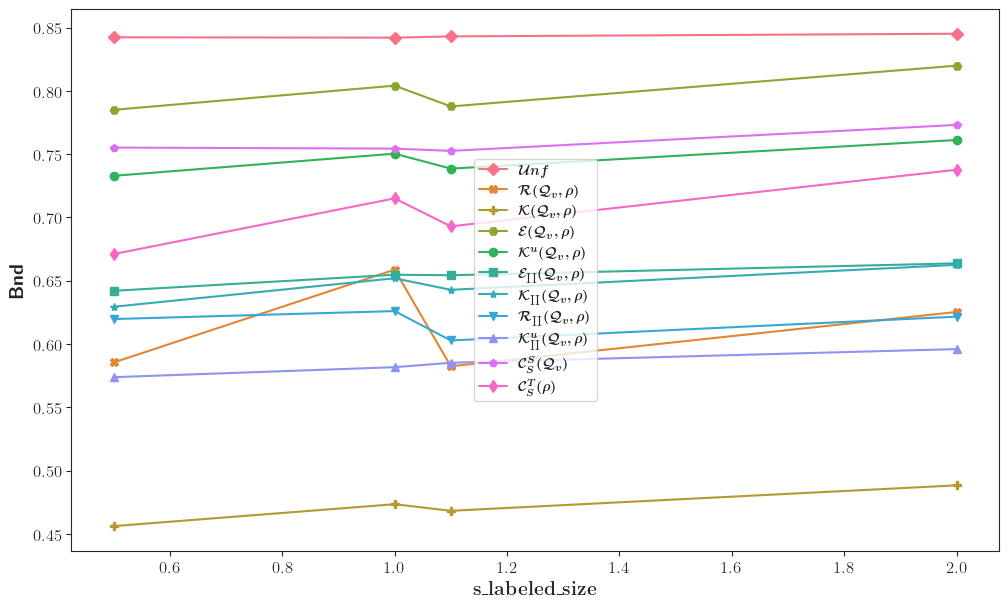

In [128]:
# Plot the data
plt.figure(figsize=(10, 6))
markers = ["D", "X", "P", "H", "o", "s", "*", "v", "^", "p", "d"]
for i, (k, bnd) in enumerate(mean_bounds.items()):
    plt.plot(bnd.index, bnd.values, marker=markers[i], color= sns.color_palette("husl", 11)[i], alpha=1, linestyle='-', label=Mv_bounds_map[k])


# Adding titles and labels
plt.title('')
plt.xlabel(r'$\bf{s\_labeled\_size}$', fontsize=14)
plt.ylabel(r'\textbf{Bnd}', fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.legend(prop={'size': 10}, loc='center')

plt.tight_layout(pad=0.4)
# Display the plot
plt.savefig("Multiple-Features_4vs9_10runs_20labeled_weak_all-alpha_results.pdf", bbox_inches='tight')
plt.show()

In [412]:
alpha = "0.5"
config = "stump"
file_name = "Multiple-Features_4vs9_10runs.csv"
mean_risks = {}
mean_bounds = {}
mean_risks_tnd = {}
mean_bounds_tnd = {}
s_labeled_sizes = ['5', '10', '20', '30', '40', '50']
alphas = ['0.5', '1', '1.1', '2']

for s in s_labeled_sizes:
    mean_risks[int(s)] = {}
    mean_bounds[int(s)] = {}
    mean_risks_tnd[int(s)] = {}
    mean_bounds_tnd[int(s)] = {}
    for alpha in alphas:
        df = experiments[s][alpha][config][file_name]
        df["Risk"] = df["Risk"].astype(float).apply(lambda x: x if x < 1 else 1)
        df["Bound"] = df["Bound"].astype(float).apply(lambda x: x if x < 1 else 1)
        grouped_df = df.groupby(["Bound_name", "View"]).mean()
        mean_risks[int(s)][float(alpha)] = grouped_df.loc["DIS_inv", "Risk"]["Multiview"]
        mean_bounds[int(s)][float(alpha)] = grouped_df.loc["DIS_inv", "Bound"]["Multiview"]
        mean_risks_tnd[int(s)][float(alpha)] = grouped_df.loc["TND_inv", "Risk"]["Multiview"]
        mean_bounds_tnd[int(s)][float(alpha)] = grouped_df.loc["TND_inv", "Bound"]["Multiview"]
        

# 3D plot of the bound value as a function of $\alpha$ and $s\_labeled\_size$

In [413]:
import plotly.graph_objects as go
# Extract x, y, and z values from the data
x = list(mean_bounds_tnd.keys())
y = list(mean_bounds_tnd[5].keys())
z = [[mean_bounds_tnd[iter][lr] for lr in y] for iter in x]  # Loss values

fig = go.Figure(go.Surface(
    x=x,
    y=y,
    z=z,
    colorscale="viridis"))

fig.update_layout(
    scene={
        "xaxis": {"title": "S_labeled_size"},
        "yaxis": {"title": "alpha"},
        "zaxis": {"title": "Bound"},
        'camera_eye': {"x": -1.25, "y": -1.25, "z": 0.5},
    })

fig.show()

In [354]:
plotly.offline.plot(fig, filename='./Multiple-feature_4vs9_alpha-vs-slabeled_DIS.html')

'./Multiple-feature_4vs9_alpha-vs-slabeled_DIS.html'